In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly
import warnings
import sklearn
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, auc
import pickle
warnings.filterwarnings('ignore')

In [6]:
train = pd.read_csv('loan-train.csv')
test = pd.read_csv('loan-test.csv')

print(f"Shape of Train_data: {train.shape}")
print(f"Shape of Test_data: {test.shape}")

Shape of Train_data: (614, 13)
Shape of Test_data: (367, 12)


In [7]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.00,267.00,360.00,1.00,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.00,95.00,360.00,1.00,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.00,158.00,360.00,0.00,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.00,168.00,360.00,1.00,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.00,349.00,360.00,1.00,Semiurban,N


In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


In [9]:
print(f"No. of Nominal Categorical data columns: {3}")
print(f"No. of Ordinal Categorical data columns: {5}")
print(f"No. of Numerical data columns: {5}")
print("-----------------------------------------------")
print('No. of missing values in train dataset:')
print(train.isnull().sum())
print("-----------------------------------------------")
print(f'No. of duplicates in train dataset: {train.duplicated().sum()}') #no duplicates
print("-----------------------------------------------")

print(train.info())

No. of Nominal Categorical data columns: 3
No. of Ordinal Categorical data columns: 5
No. of Numerical data columns: 5
-----------------------------------------------
No. of missing values in train dataset:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
-----------------------------------------------
No. of duplicates in train dataset: 0
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null 

## UNIVARIATE ANALYSIS

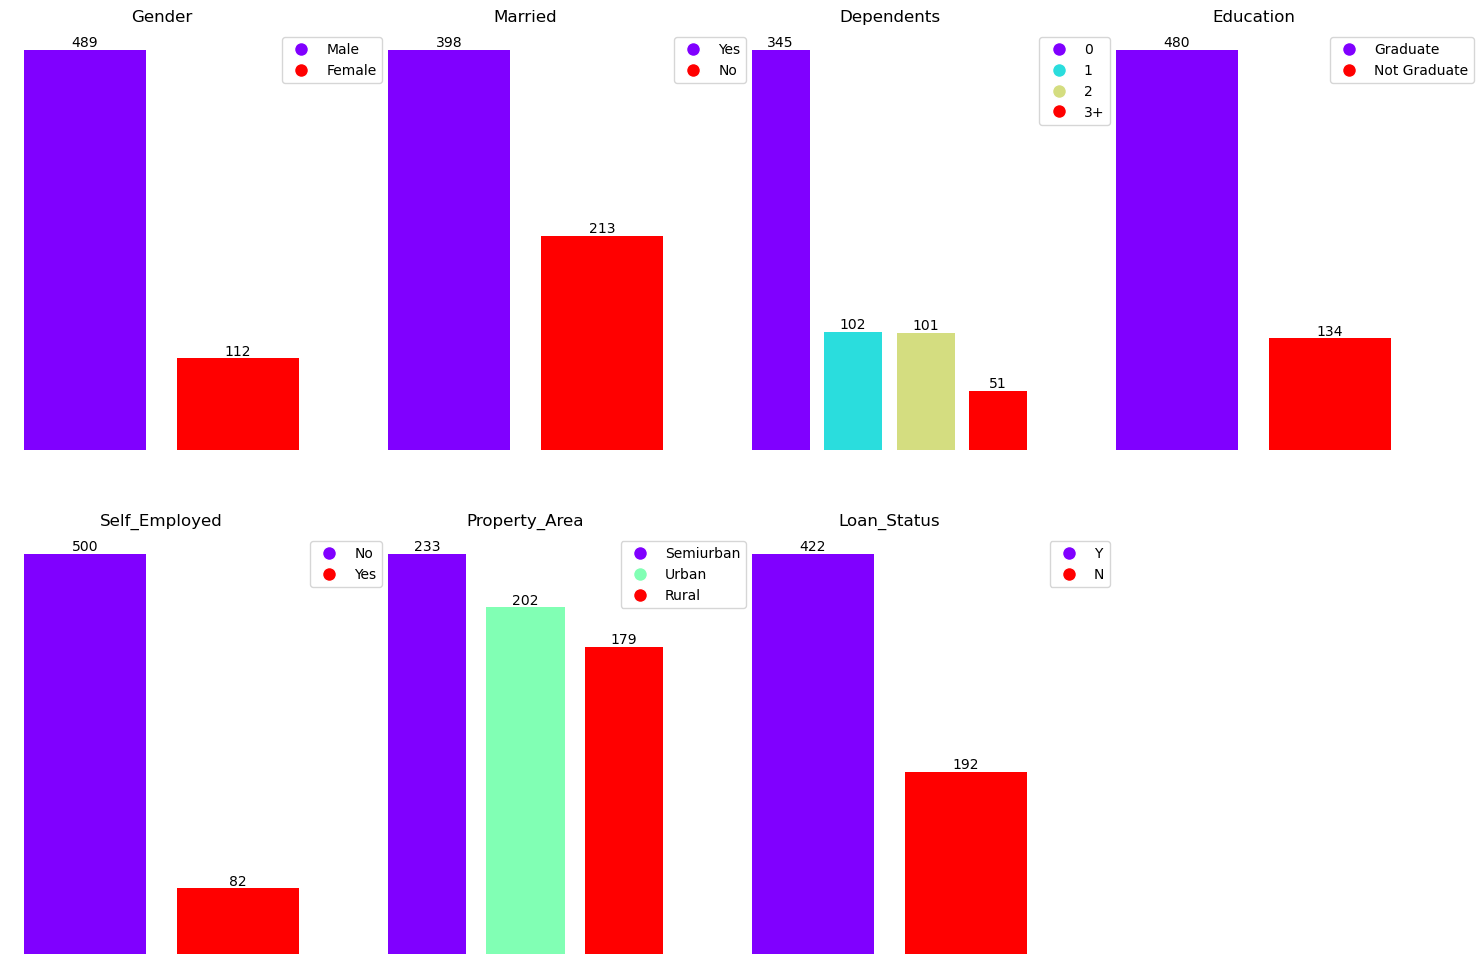

In [10]:
def plot_categorical_data(data, column_name):
    # Count the occurrences of each category
    value_counts = data[column_name].value_counts()
    num_categories = len(value_counts)
    colors = plt.cm.rainbow(np.linspace(0, 1, num_categories))
    
    bars = plt.bar(value_counts.index, value_counts.values, color=colors)
    
    # Customize the plot
    plt.title(f'{column_name}')
    plt.xlabel(column_name)

    
    # Rotate x-axis labels if there are many categories
    if len(value_counts) > 5:
        plt.xticks(rotation=45, ha='right')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height}',
                 ha='center', va='bottom')
    
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category,
                                  markerfacecolor=color, markersize=10)
                       for category, color in zip(value_counts.index, colors)]
    
    plt.legend(handles=legend_elements,loc='upper right', bbox_to_anchor=(1.25, 1))

plt.figure(figsize=(18,12))

plt.subplot(2,4,1)
plot_categorical_data(train,'Gender')
plt.axis('off')

plt.subplot(2,4,2)
plot_categorical_data(train,'Married')
plt.axis('off')

plt.subplot(2,4,3)
plot_categorical_data(train,'Dependents')
plt.axis('off')

plt.subplot(2,4,4)
plot_categorical_data(train,'Education')
plt.axis('off')

plt.subplot(2,4,5)
plot_categorical_data(train,'Self_Employed')
plt.axis('off')

plt.subplot(2,4,6)
plot_categorical_data(train,'Property_Area')
plt.axis('off')

plt.subplot(2,4,7)
plot_categorical_data(train,'Loan_Status')
plt.axis('off')

plt.show()

Text(0.5, 1.0, 'Credit_History')

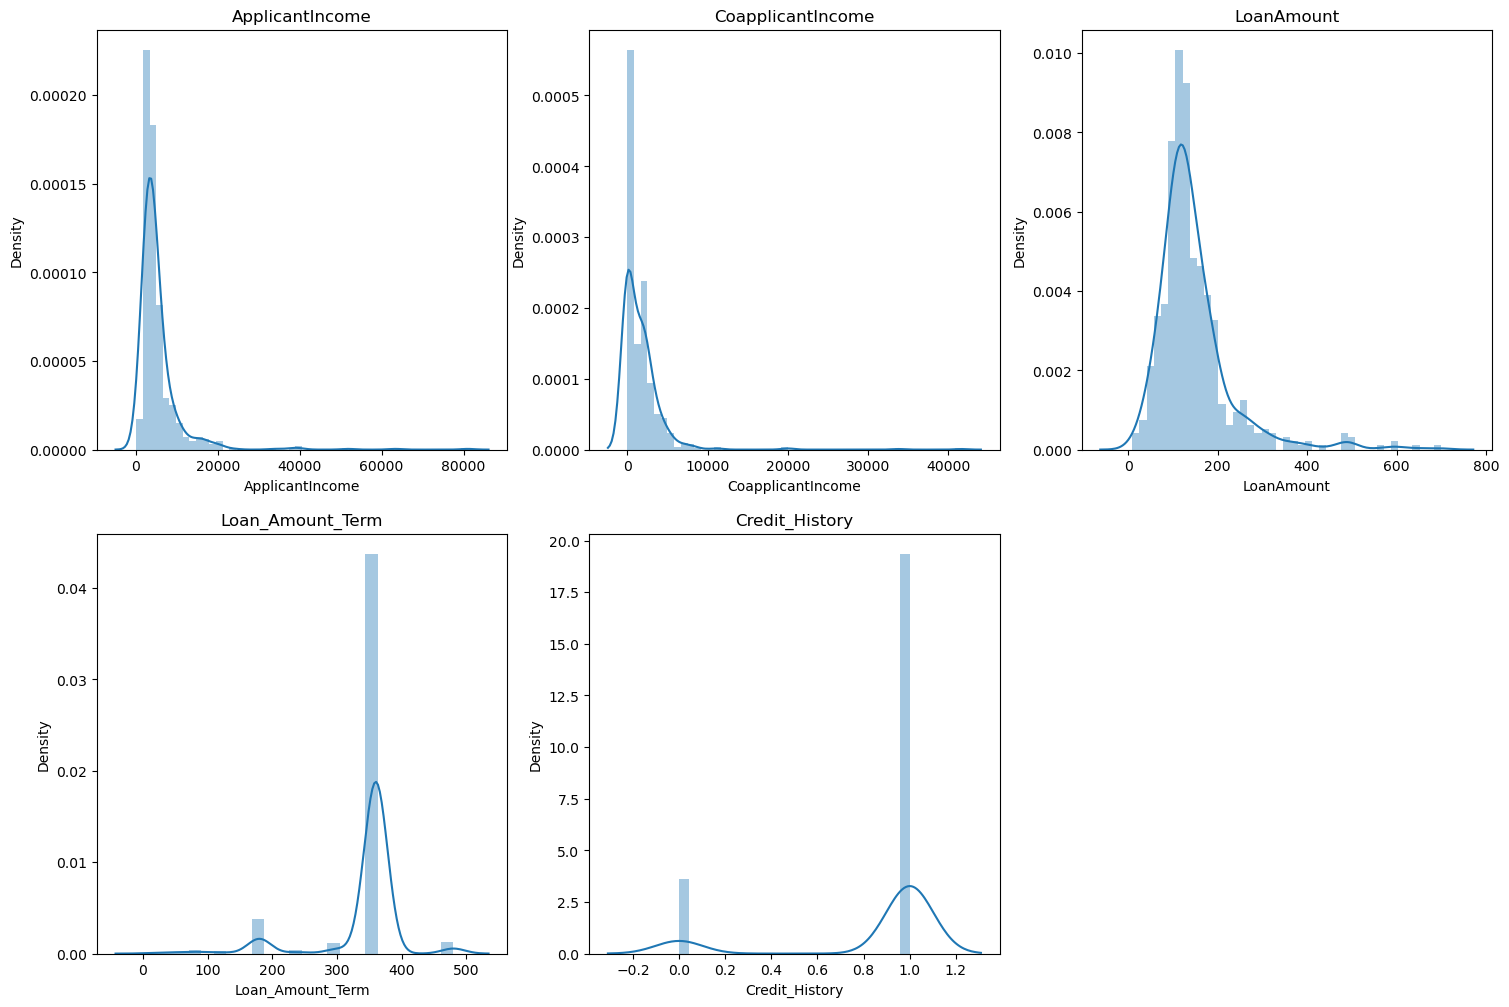

In [11]:
plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
sns.distplot(train['ApplicantIncome'])
plt.title('ApplicantIncome')

plt.subplot(2,3,2)
sns.distplot(train['CoapplicantIncome'])
plt.title('CoapplicantIncome')

plt.subplot(2,3,3)
sns.distplot(train['LoanAmount'])
plt.title('LoanAmount')

plt.subplot(2,3,4)
sns.distplot(train['Loan_Amount_Term'])
plt.title('Loan_Amount_Term')

plt.subplot(2,3,5)
sns.distplot(train['Credit_History'])
plt.title('Credit_History')

## BIVARIATE ANALYSIS

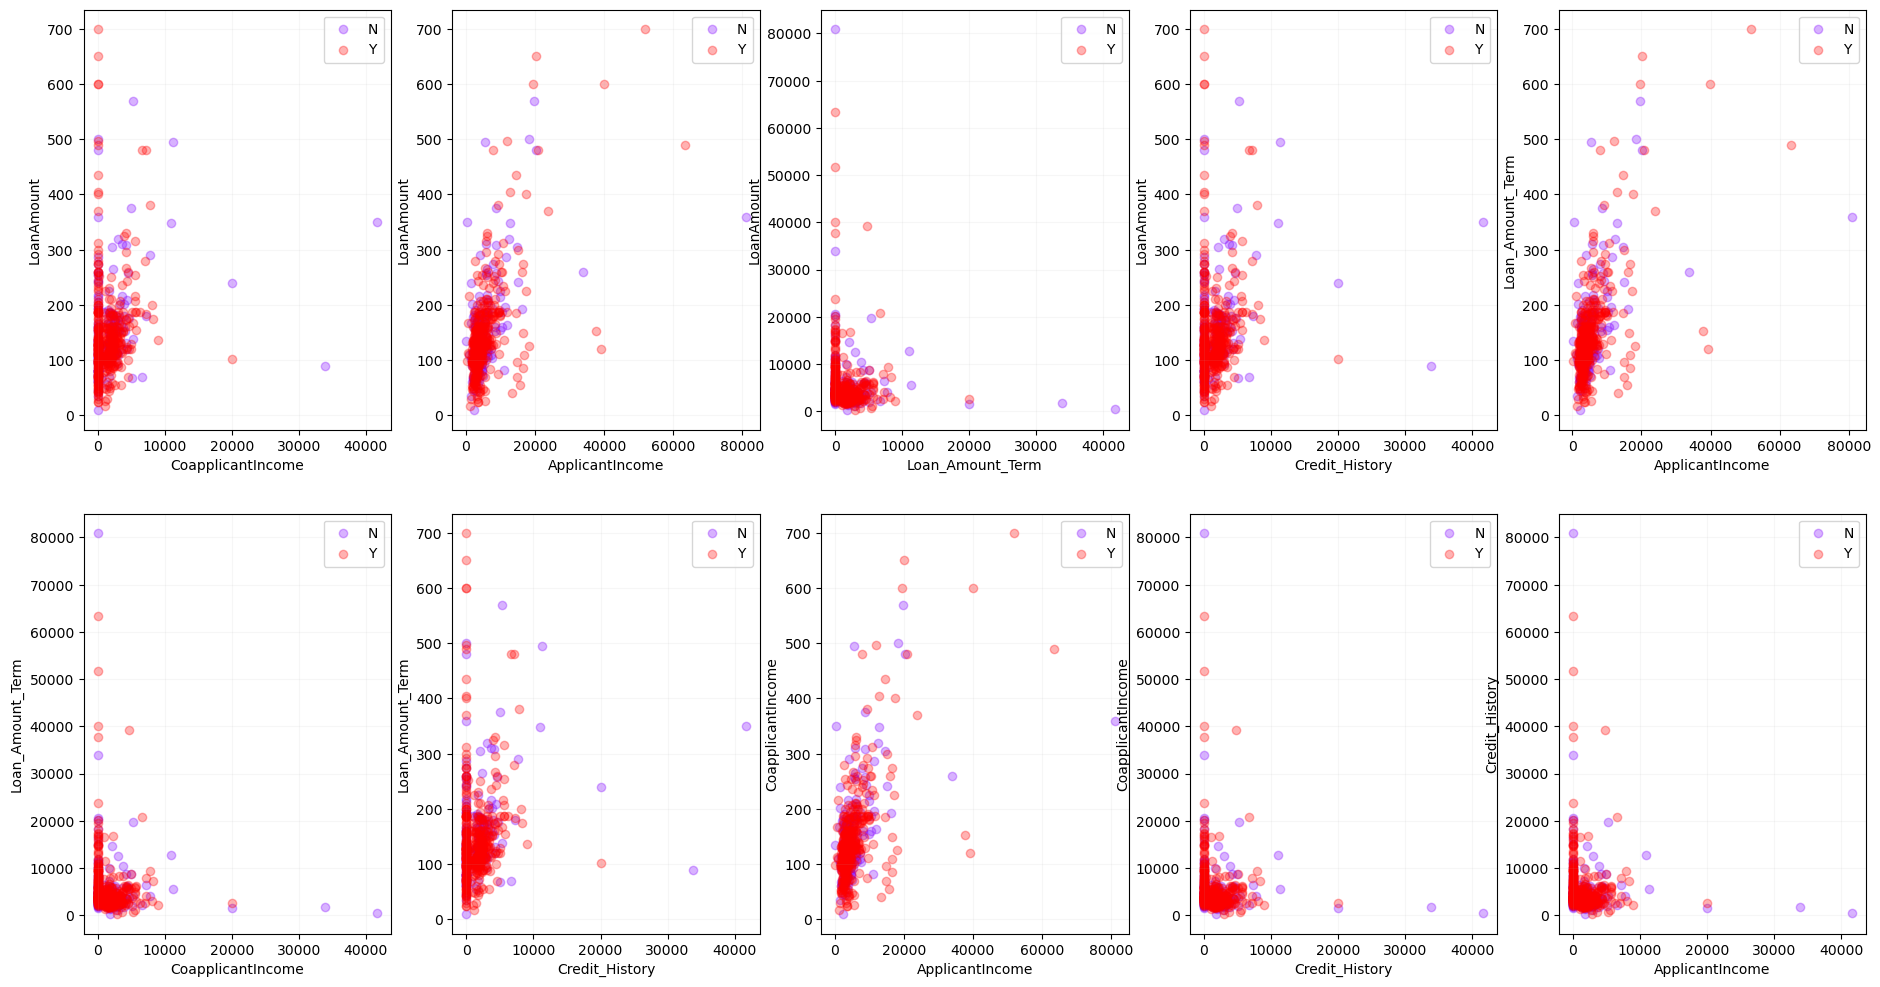

In [12]:
def scatter_plot_with_labels(x, y, labels,feature1,feature2):
    # Create a color map
    unique_labels = np.unique(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    
    # Create the scatter plot
    for label, color in zip(unique_labels, colors):
        mask = labels == label
        plt.scatter(x[mask], y[mask], c=[color], label=label, alpha=0.3)
    
    plt.xlabel(f'{feature1}')
    plt.ylabel(f'{feature2}')
    plt.legend()
    plt.grid(True, alpha=0.1)

plt.figure(figsize=(23,12))

plt.subplot(2,5,1)
scatter_plot_with_labels(train['CoapplicantIncome'],train['LoanAmount'],train['Loan_Status'],'CoapplicantIncome','LoanAmount')
plt.subplot(2,5,2)
scatter_plot_with_labels(train['ApplicantIncome'],train['LoanAmount'],train['Loan_Status'],'ApplicantIncome','LoanAmount')
plt.subplot(2,5,3)
scatter_plot_with_labels(train['CoapplicantIncome'],train['ApplicantIncome'],train['Loan_Status'],'Loan_Amount_Term','LoanAmount')
plt.subplot(2,5,4)
scatter_plot_with_labels(train['CoapplicantIncome'],train['LoanAmount'],train['Loan_Status'],'Credit_History','LoanAmount')
plt.subplot(2,5,5)
scatter_plot_with_labels(train['ApplicantIncome'],train['LoanAmount'],train['Loan_Status'],'ApplicantIncome','Loan_Amount_Term')
plt.subplot(2,5,6)
scatter_plot_with_labels(train['CoapplicantIncome'],train['ApplicantIncome'],train['Loan_Status'],'CoapplicantIncome','Loan_Amount_Term')
plt.subplot(2,5,7)
scatter_plot_with_labels(train['CoapplicantIncome'],train['LoanAmount'],train['Loan_Status'],'Credit_History','Loan_Amount_Term')
plt.subplot(2,5,8)
scatter_plot_with_labels(train['ApplicantIncome'],train['LoanAmount'],train['Loan_Status'],'ApplicantIncome','CoapplicantIncome')
plt.subplot(2,5,9)
scatter_plot_with_labels(train['CoapplicantIncome'],train['ApplicantIncome'],train['Loan_Status'],'Credit_History','CoapplicantIncome')
plt.subplot(2,5,10)
scatter_plot_with_labels(train['CoapplicantIncome'],train['ApplicantIncome'],train['Loan_Status'],'ApplicantIncome','Credit_History')

plt.show()

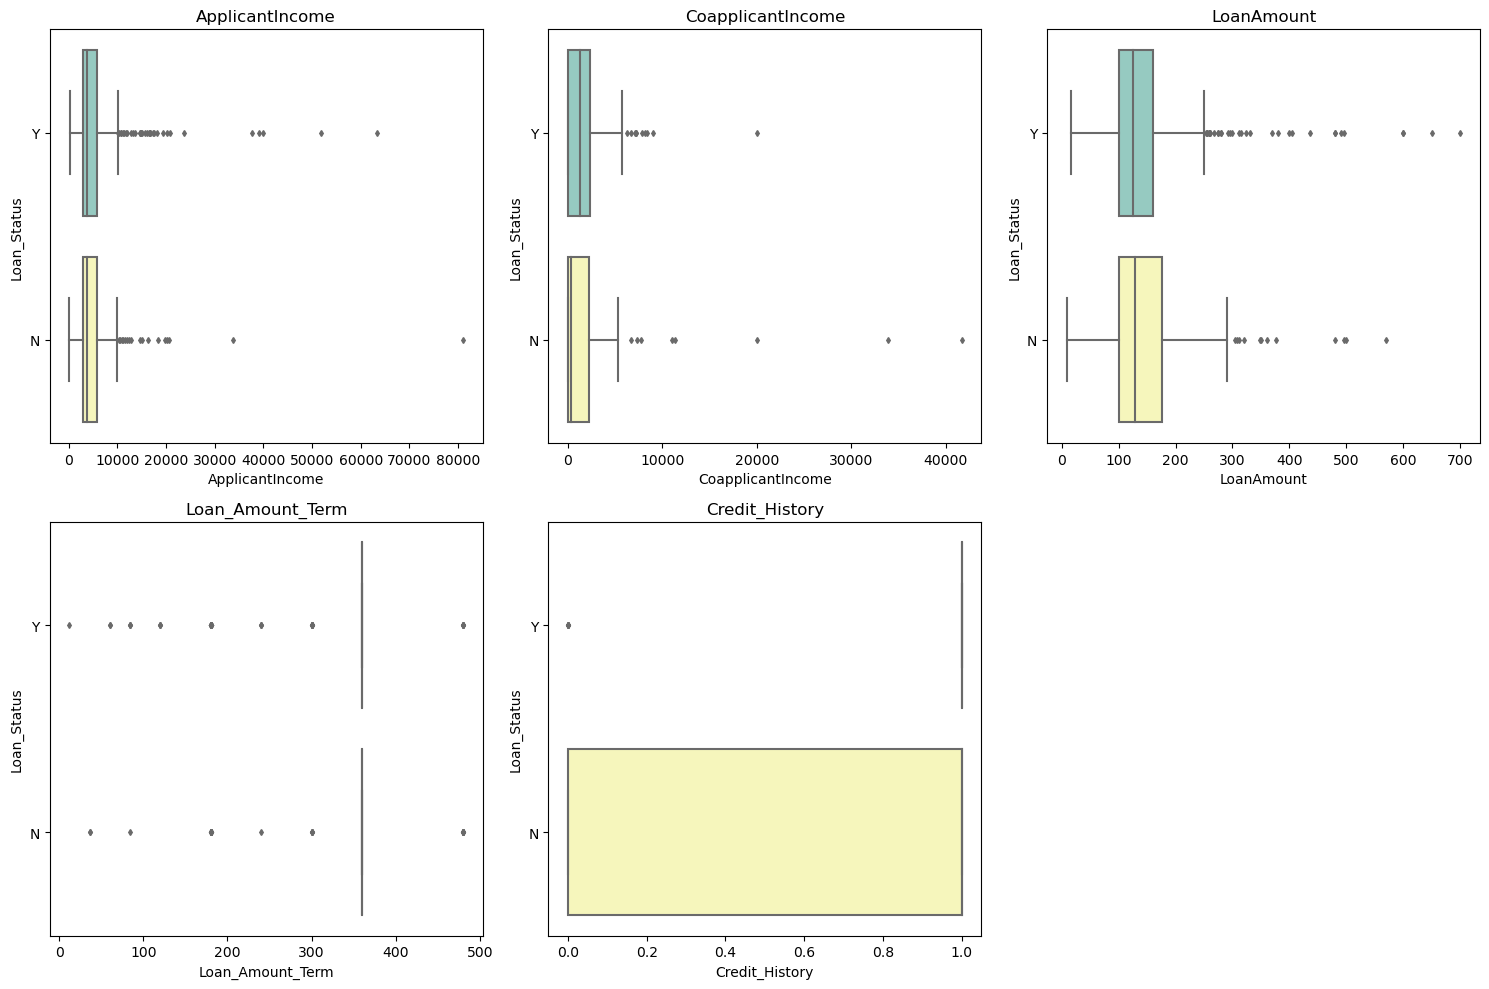

In [13]:
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [col for col in numerical_columns if col != 'Loan_Status']

n_cols = 3
n_rows = (len(numerical_columns) - 1) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Create boxplots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(y='Loan_Status', x=col, data=train, ax=axes[i], palette='Set3', orient='h',fliersize=3)
    axes[i].set_title(col)
#     axes[i].set_xlabel('Loan_Status')
#     axes[i].set_ylabel(col)

# Remove any unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

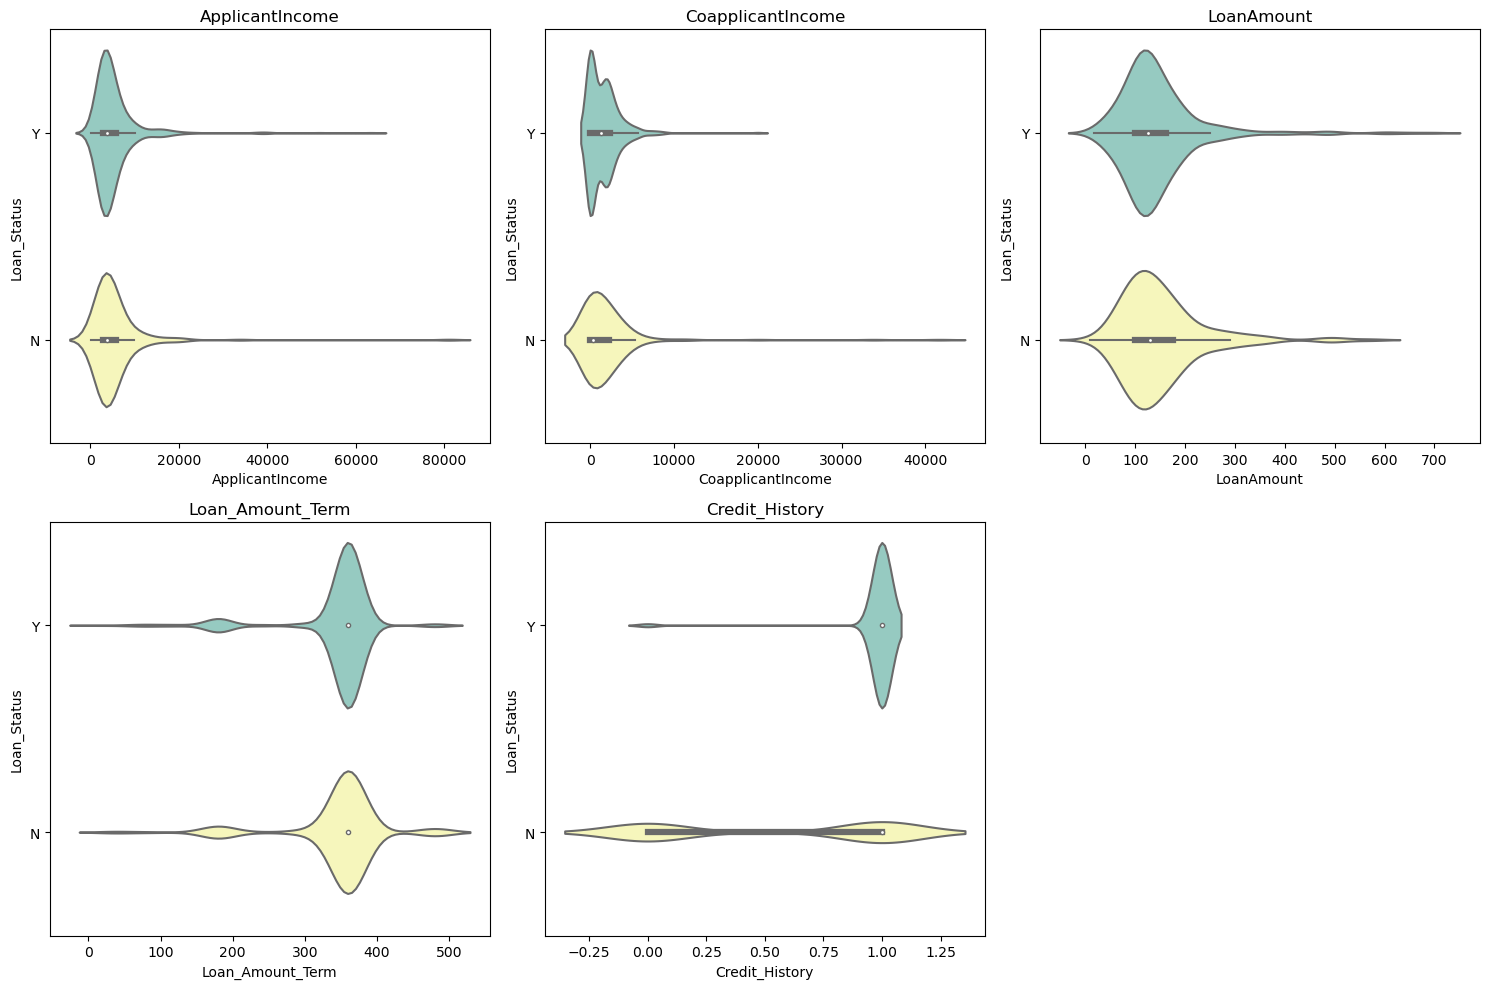

In [14]:
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [col for col in numerical_columns if col != 'Loan_Status']

n_cols = 3
n_rows = (len(numerical_columns) - 1) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Create boxplots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.violinplot(y='Loan_Status', x=col, data=train, ax=axes[i], palette='Set3', orient='h')
    axes[i].set_title(col)
#     axes[i].set_xlabel('Loan_Status')
#     axes[i].set_ylabel(col)

# Remove any unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<h2>Data Preprocessing</h2>

In [15]:
df=train.copy()
df=df.drop(['Loan_ID'],axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y


In [39]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<h3>Imputing the missing values</h3>

In [16]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df['Gender'] = df['Gender'].fillna(value='Not Known')
df['Married'] = df['Married'].fillna(value='Not Specified')
df['Dependents'] = df['Dependents'].fillna(value='Unknown')
df['Self_Employed'] = df['Self_Employed'].fillna(value='Not Specified')
df['LoanAmount'] = df['LoanAmount'].fillna(value=df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(value=df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(value=df['Credit_History'].median())

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<h3>Encoding the categorical data</h3>

In [18]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.00,128.00,360.00,1.00,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.00,71.00,360.00,1.00,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.00,40.00,180.00,1.00,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.00,253.00,360.00,1.00,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.00,187.00,360.00,1.00,Urban,Y


In [19]:
# Columns for One Hot Encoding : {'Gender','Property_Area'}
# Columns for Label Encoding : {'Married','Dependents','Education','Self_Employed','Loan_Status'}

one_hot_encoder = OneHotEncoder(drop='first',dtype=np.int64,sparse=False, handle_unknown='ignore')
ordinal_encoder = OrdinalEncoder(dtype=np.int64)

In [20]:
df['Married']=ordinal_encoder.fit_transform(np.array(df['Married']).reshape(-1,1))
df['Dependents']=ordinal_encoder.fit_transform(np.array(df['Dependents']).reshape(-1,1))
df['Education']=ordinal_encoder.fit_transform(np.array(df['Education']).reshape(-1,1))
df['Self_Employed']=ordinal_encoder.fit_transform(np.array(df['Self_Employed']).reshape(-1,1))
df['Loan_Status']=ordinal_encoder.fit_transform(np.array(df['Loan_Status']).reshape(-1,1))

In [21]:
encoded_data = one_hot_encoder.fit_transform(df[['Gender', 'Property_Area']])
feature_names = one_hot_encoder.get_feature_names_out(['Gender', 'Property_Area'])
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)
df = df.drop(['Gender', 'Property_Area'], axis=1)
df = pd.concat([df, encoded_df], axis=1)

In [22]:
df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Gender_Not Known,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,0,5849,0.00,128.00,360.00,1.00,1,1,0,0,1
1,2,1,0,0,4583,1508.00,128.00,360.00,1.00,0,1,0,0,0
2,2,0,0,2,3000,0.00,66.00,360.00,1.00,1,1,0,0,1
3,2,0,1,0,2583,2358.00,120.00,360.00,1.00,1,1,0,0,1
4,0,0,0,0,6000,0.00,141.00,360.00,1.00,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.00,71.00,360.00,1.00,1,0,0,0,0
610,2,3,0,0,4106,0.00,40.00,180.00,1.00,1,1,0,0,0
611,2,1,0,0,8072,240.00,253.00,360.00,1.00,1,1,0,0,1
612,2,2,0,0,7583,0.00,187.00,360.00,1.00,1,1,0,0,1


In [23]:
X=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

<h3>Scaling the data</h3>

In [24]:
scaler = StandardScaler()
columns=X.columns
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=columns)
X

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_Not Known,Property_Area_Semiurban,Property_Area_Urban
0,-1.37,-0.75,-0.53,-0.46,0.07,-0.55,-0.21,0.27,0.41,0.51,-0.15,-0.78,1.43
1,0.73,0.14,-0.53,-0.46,-0.13,-0.04,-0.21,0.27,0.41,0.51,-0.15,-0.78,-0.70
2,0.73,-0.75,-0.53,2.41,-0.39,-0.55,-0.95,0.27,0.41,0.51,-0.15,-0.78,1.43
3,0.73,-0.75,1.89,-0.46,-0.46,0.25,-0.31,0.27,0.41,0.51,-0.15,-0.78,1.43
4,-1.37,-0.75,-0.53,-0.46,0.10,-0.55,-0.06,0.27,0.41,0.51,-0.15,-0.78,1.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-1.37,-0.75,-0.53,-0.46,-0.41,-0.55,-0.89,0.27,0.41,-1.98,-0.15,-0.78,-0.70
610,0.73,1.93,-0.53,-0.46,-0.21,-0.55,-1.26,-2.52,0.41,0.51,-0.15,-0.78,-0.70
611,0.73,0.14,-0.53,-0.46,0.44,-0.47,1.28,0.27,0.41,0.51,-0.15,-0.78,1.43
612,0.73,1.03,-0.53,-0.46,0.36,-0.55,0.49,0.27,0.41,0.51,-0.15,-0.78,1.43


<AxesSubplot:>

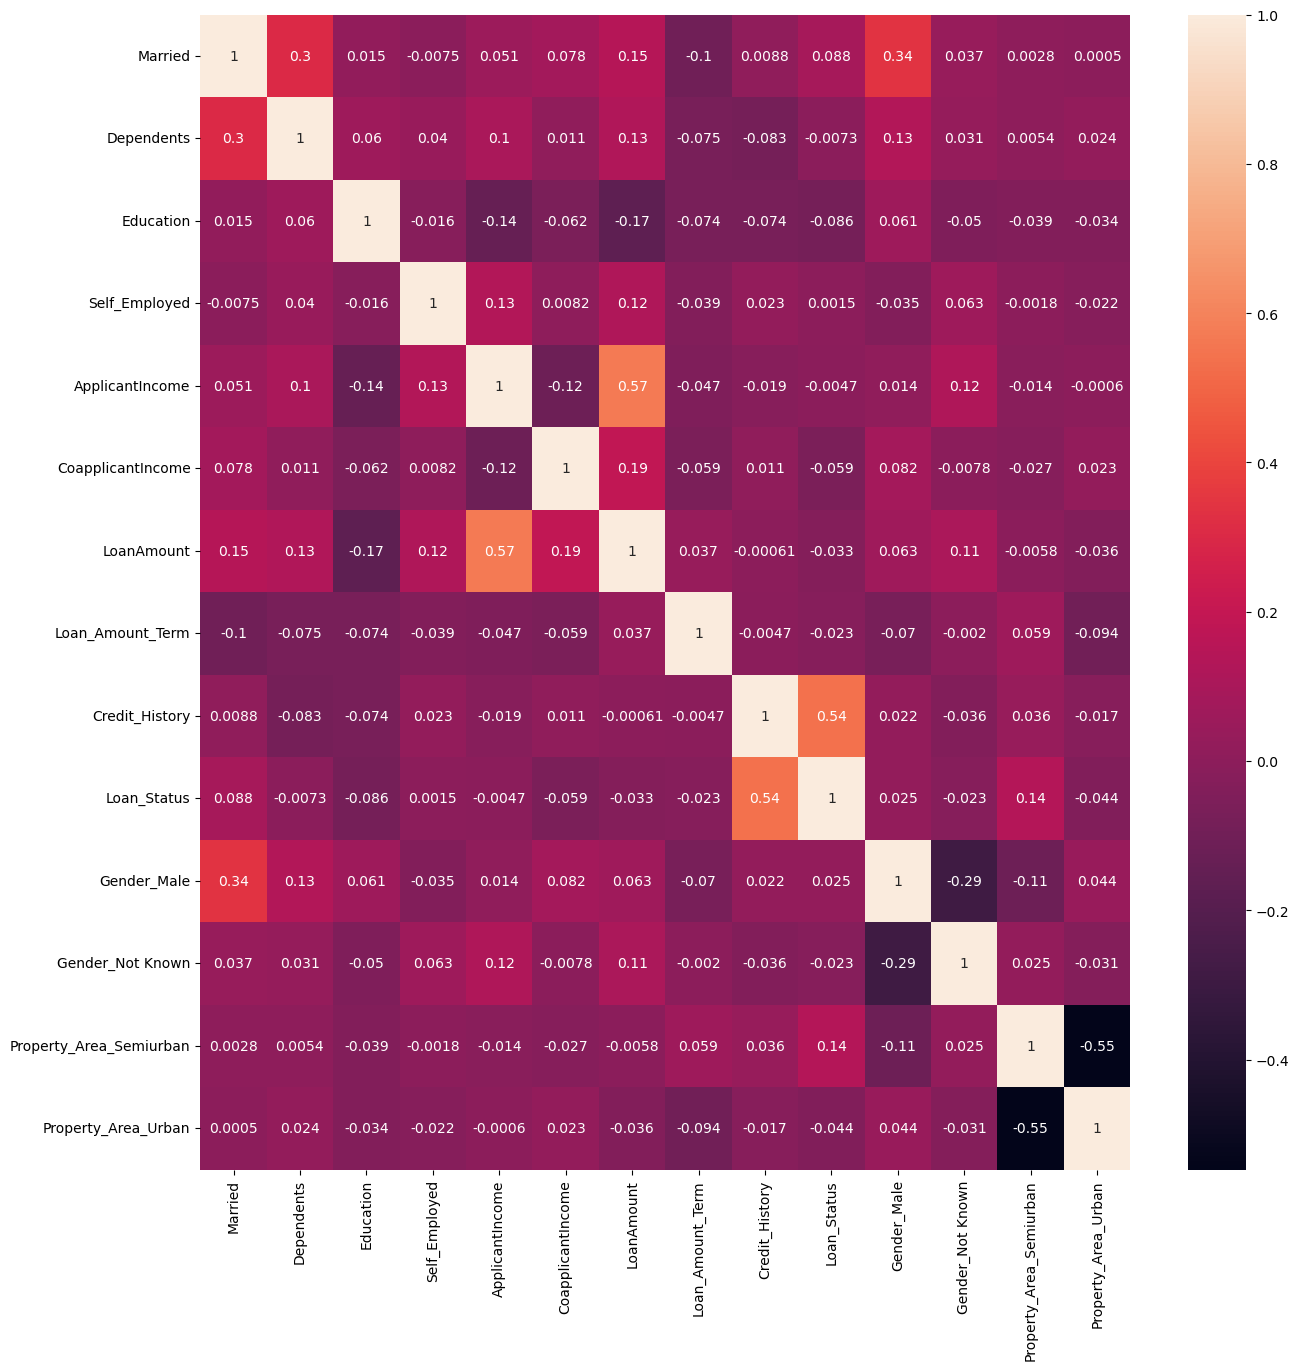

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

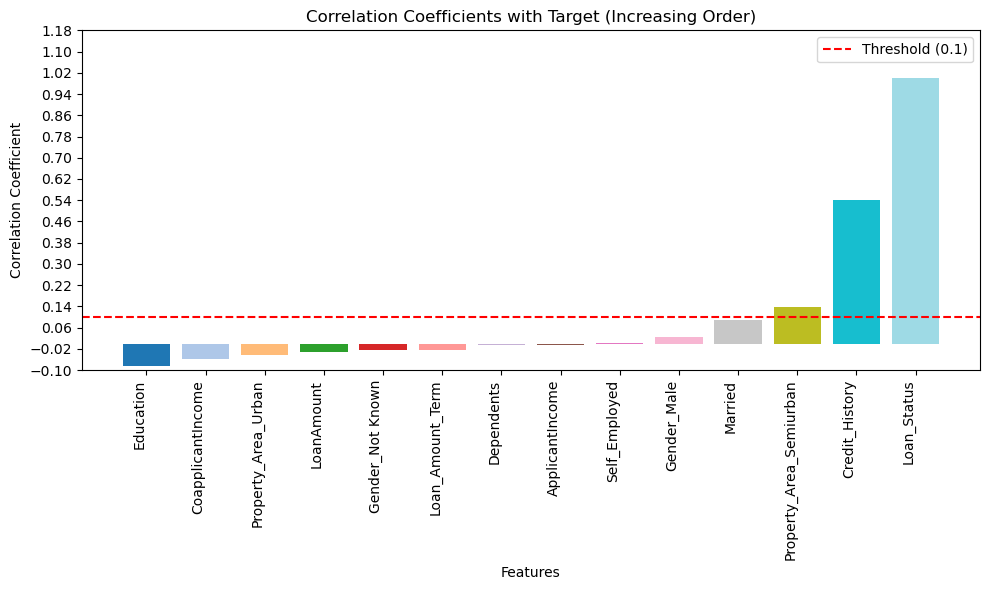

In [26]:
def select_features_pearson_corr(df, target_col):

    corr_target = df.corr()[target_col]
    return corr_target

def plot_correlation_barplot(corr_series):

    plt.figure(figsize=(10, 6))

    # Sort correlation coefficients in increasing order
    corr_series_sorted = corr_series.sort_values(ascending=True)
    
        # Create a colormap
    cmap = plt.cm.get_cmap('tab20')
    colors = cmap(np.linspace(0, 1, len(corr_series_sorted)))

    # Create the bar plot
    plt.bar(range(len(corr_series_sorted)), corr_series_sorted, color=colors)
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.title('Correlation Coefficients with Target (Increasing Order)')

    # Set y-axis limits and subdivisions
    plt.ylim(-0.1, 1.1)  # Adjust y-axis limits to include -0.1 and 1.1
    plt.yticks(np.arange(-0.1, 1.2, 0.08))  # Set subdivisions of 0.05

    # Plot horizontal line at y=0.1
    plt.axhline(y=0.1, color='red', linestyle='--', label='Threshold (0.1)')
    plt.legend()

    plt.xticks(range(len(corr_series_sorted.index.to_numpy())), 
               corr_series_sorted.index.to_numpy(), 
               rotation=90, ha='right'
              )
    plt.tight_layout()
    plt.show()

target_col = 'Loan_Status'

# Calculate correlation coefficients
corr_series = select_features_pearson_corr(df, target_col)

# Plot correlation barplots
plot_correlation_barplot(corr_series)



In [27]:
X=X.drop(['LoanAmount','Gender_Not Known','Loan_Amount_Term','Dependents','ApplicantIncome','Self_Employed','Gender_Male'],axis=1)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
X_train.columns

Index(['Married', 'Education', 'CoapplicantIncome', 'Credit_History',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [29]:
def custom_metrics(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    return f1, precision, recall

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=custom_metrics)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

models[['F1 Score', 'Precision', 'Recall']] = pd.DataFrame(models['custom_metrics'].tolist(), index=models.index)
models = models.drop('custom_metrics', axis=1)

100%|██████████| 29/29 [00:01<00:00, 16.66it/s]

[LightGBM] [Info] Number of positive: 342, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696538 -> initscore=0.830864
[LightGBM] [Info] Start training from score 0.830864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [30]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken,Precision,Recall
Model,,,,,,,
LGBMClassifier,0.80,0.73,0.73,0.75,0.31,0.85,0.73
XGBClassifier,0.79,0.72,0.72,0.74,0.16,0.80,0.72
LabelPropagation,0.80,0.72,0.72,0.74,0.02,0.84,0.72
LabelSpreading,0.80,0.72,0.72,0.74,0.03,0.84,0.72
Perceptron,0.80,0.71,0.71,0.73,0.02,0.86,0.71
NearestCentroid,0.80,0.71,0.71,0.73,0.02,0.86,0.71
RandomForestClassifier,0.76,0.71,0.71,0.72,0.19,0.75,0.71
LogisticRegression,0.79,0.70,0.70,0.72,0.03,0.85,0.70
SVC,0.79,0.70,0.70,0.72,0.03,0.85,0.70


In [31]:
classificationModels = [SVC(),
                       LinearSVC(),
                       LogisticRegression(),
                       RandomForestClassifier(),
                       GradientBoostingClassifier(),
                       DecisionTreeClassifier(),
                       BernoulliNB(),
                       MultinomialNB(),
                       GaussianNB()]

In [32]:
lgbmClassifier = LGBMClassifier()
lgbmClassifier.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 342, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696538 -> initscore=0.830864
[LightGBM] [Info] Start training from score 0.830864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

LGBMClassifier()

In [33]:
y_pred_train=lgbmClassifier.predict(X_train)
y_pred_test=lgbmClassifier.predict(X_test)

In [35]:
print(f'Train accuracy: {accuracy_score(y_train,y_pred_train)}')
print(f'Test accuracy: {accuracy_score(y_test,y_pred_test)}')
print(f'Train precision: {precision_score(y_train,y_pred_train)}')
print(f'Test precision: {precision_score(y_test,y_pred_test)}')

Train accuracy: 0.835030549898167
Test accuracy: 0.7886178861788617
Train precision: 0.8190709046454768
Test precision: 0.77


In [36]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.47      0.61        43
           1       0.77      0.96      0.86        80

    accuracy                           0.79       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.80      0.79      0.77       123



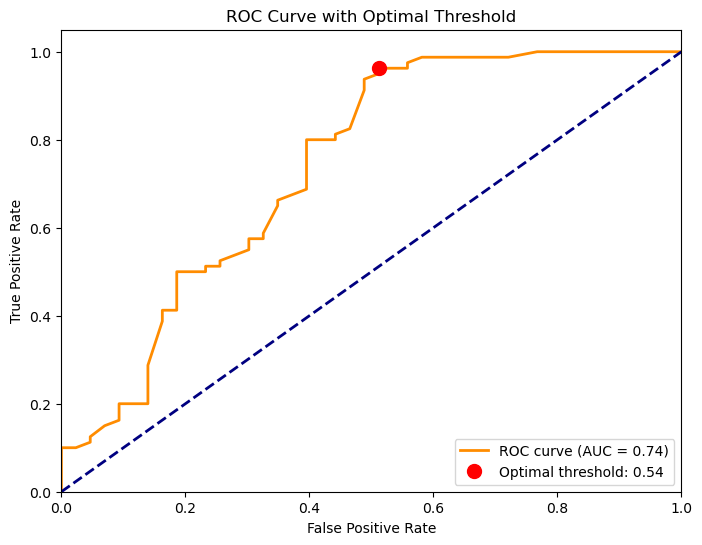

AUC-ROC score: 0.7403
Optimal threshold: 0.5364
Accuracy with 0.5 threshold: 0.7886
Accuracy with 0.5364466794321765 threshold: 0.7967

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.88      0.49      0.63        43
           1       0.78      0.96      0.86        80

    accuracy                           0.80       123
   macro avg       0.83      0.73      0.74       123
weighted avg       0.81      0.80      0.78       123



In [37]:
y_pred_proba = lgbmClassifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Calculate Youden's J statistic to find the optimal threshold
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_point = (fpr[optimal_idx], tpr[optimal_idx])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(optimal_point[0], optimal_point[1], 'ro', markersize=10, label=f'Optimal threshold: {optimal_threshold:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimal Threshold')
plt.legend(loc="lower right")
plt.show()

# Print the AUC score and optimal threshold
print(f'AUC-ROC score: {roc_auc:.4f}')
print(f'Optimal threshold: {optimal_threshold:.4f}')

# Apply the optimal threshold to get predictions
y_pred_old = (y_pred_proba >= 0.5).astype(int)
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and print the accuracy with the optimal threshold
accuracy_old = (y_pred_old == y_test).mean()
accuracy_new = (y_pred_optimal == y_test).mean()
print(f'Accuracy with 0.5 threshold: {accuracy_old:.4f}')
print(f'Accuracy with {optimal_threshold} threshold: {accuracy_new:.4f}')

# You can also print other metrics like precision, recall, and F1-score
from sklearn.metrics import classification_report
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

In [38]:
#new threshold is 0.53644
with open('model.pkl', 'wb') as file:
    pickle.dump(lgbmClassifier, file)

with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
